<a href="https://colab.research.google.com/github/kylemath/visual-illusions/blob/master/Vis_Illusion_Pick256_GAN_Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mo Illusions dataset:
https://drive.google.com/drive/u/0/folders/1R2626myKPLIcHksYDuKRTbROE77VGaj5

Scrape pics from google images


In [0]:
#!git clone https://github.com/montoyamoraga/scrapers.git

In [0]:
#!python3 script.py "illusion" 5000


Scrape pics from Reddit

In [0]:
#ripme scrapper

Pre-process images for gan

In [0]:
#!git clone https://github.com/genekogan/ml4a-guides

In [0]:
#python3 dataset_utils.py --input_src /Users/kylemathewson/scrapers/scraper-google-images/images_illusion/_jpg --shuffle --output_dir /Users/kylemathewson/scrapers/scraper-google-images/images_illusion/ --w 128 --h 128 --centered --action none --save_ext jpg --save_mode output_only


Install DCGAN repo

In [1]:
!git clone https://github.com/carpedm20/DCGAN-tensorflow
%cd DCGAN-tensorflow


Cloning into 'DCGAN-tensorflow'...
remote: Enumerating objects: 1087, done.
remote: Total 1087 (delta 0), reused 0 (delta 0), pack-reused 1087
Receiving objects: 100% (1087/1087), 77.96 MiB | 28.19 MiB/s, done.
Resolving deltas: 100% (613/613), done.
/content/DCGAN-tensorflow


mount your google drive to load and save pics

In [2]:
#mount google drive to load own images, follow link and get code and paste in below
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/pics/" #save images here

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


to save images

In [0]:
%mkdir samples



Functions to display images

In [0]:
from IPython.display import clear_output, Image, display, HTML
from io import BytesIO
import scipy.misc
import numpy as np
import PIL.Image


def load_image(path, h, w):
    img0 = scipy.misc.imread(path, mode='RGB')
    img0 = scipy.misc.imresize(img0, (h, w)).astype('float64')
    return img0
  
def display_image(a, fmt='jpeg'):
    a = np.uint8(np.clip(a/255., 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))


Run a few training epochs and view results each time


In [0]:
from shutil import copyfile


In [0]:
#output size for viewing
h = 512 #make bigger to see in display
w = 512
#%mkdir /content/gdrive/My\ Drive/pics/IllusionsPick_out/

for i_epoch in range(500):
    !python main.py --dataset IllusionsPick --data_dir /content/gdrive/My\ Drive/pics --generate_test_images 5 --input_height 128 --output_height 128 --checkpoint_dir /content/gdrive/My\ Drive/pics/gan_models --sample_dir /content/gdrive/My\ Drive/pics --epoch 50 --train  
    for i in range(5):
      img0 = load_image("samples/test_arange_" + str(i) + ".png",h, w)
      display_image(img0)
      copyfile("samples/test_arange_" + str(i) + ".png", "/content/gdrive/My Drive/pics/IllusionsPick_out/Illusions_" + str(i_epoch) + "_" + str(i) + ".png")




Train the model (saves checkpoints)

In [0]:
!python main.py --dataset illusions256 --data_dir /content/gdrive/My\ Drive/pics --input_height 256 --output_height 256 --checkpoint_dir /content/gdrive/My\ Drive/pics/gan_models --sample_dir /content/gdrive/My\ Drive/pics --epoch 1000 --train  


{'batch_size': <absl.flags._flag.Flag object at 0x7ff065e590d0>,
 'beta1': <absl.flags._flag.Flag object at 0x7ff065e4bf90>,
 'checkpoint_dir': <absl.flags._flag.Flag object at 0x7ff065e59450>,
 'crop': <absl.flags._flag.BooleanFlag object at 0x7ff065e595d0>,
 'data_dir': <absl.flags._flag.Flag object at 0x7ff065e594d0>,
 'dataset': <absl.flags._flag.Flag object at 0x7ff065e59350>,
 'epoch': <absl.flags._flag.Flag object at 0x7ff07255fa50>,
 'generate_test_images': <absl.flags._flag.Flag object at 0x7ff065e596d0>,
 'h': <tensorflow.python.platform.app._HelpFlag object at 0x7ff065e59710>,
 'help': <tensorflow.python.platform.app._HelpFlag object at 0x7ff065e59710>,
 'helpfull': <tensorflow.python.platform.app._HelpfullFlag object at 0x7ff065e59750>,
 'helpshort': <tensorflow.python.platform.app._HelpshortFlag object at 0x7ff065e59790>,
 'input_fname_pattern': <absl.flags._flag.Flag object at 0x7ff065e593d0>,
 'input_height': <absl.flags._flag.Flag object at 0x7ff065e59150>,
 'input_widt

to only generate:

In [6]:
!python main.py --dataset illusions256 --data_dir /content/gdrive/My\ Drive/pics --input_height 256 --output_height 256 --checkpoint_dir /content/gdrive/My\ Drive/pics/gan_models --sample_dir /content/gdrive/My\ Drive/pics --epoch 100 


{'batch_size': <absl.flags._flag.Flag object at 0x7f119d749050>,
 'beta1': <absl.flags._flag.Flag object at 0x7f119d734f10>,
 'checkpoint_dir': <absl.flags._flag.Flag object at 0x7f119d7493d0>,
 'crop': <absl.flags._flag.BooleanFlag object at 0x7f119d749550>,
 'data_dir': <absl.flags._flag.Flag object at 0x7f119d749450>,
 'dataset': <absl.flags._flag.Flag object at 0x7f119d7492d0>,
 'epoch': <absl.flags._flag.Flag object at 0x7f11a8fb2890>,
 'generate_test_images': <absl.flags._flag.Flag object at 0x7f119d749650>,
 'h': <tensorflow.python.platform.app._HelpFlag object at 0x7f119d749690>,
 'help': <tensorflow.python.platform.app._HelpFlag object at 0x7f119d749690>,
 'helpfull': <tensorflow.python.platform.app._HelpfullFlag object at 0x7f119d7496d0>,
 'helpshort': <tensorflow.python.platform.app._HelpshortFlag object at 0x7f119d749710>,
 'input_fname_pattern': <absl.flags._flag.Flag object at 0x7f119d749350>,
 'input_height': <absl.flags._flag.Flag object at 0x7f119d7490d0>,
 'input_widt

Display a few results

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


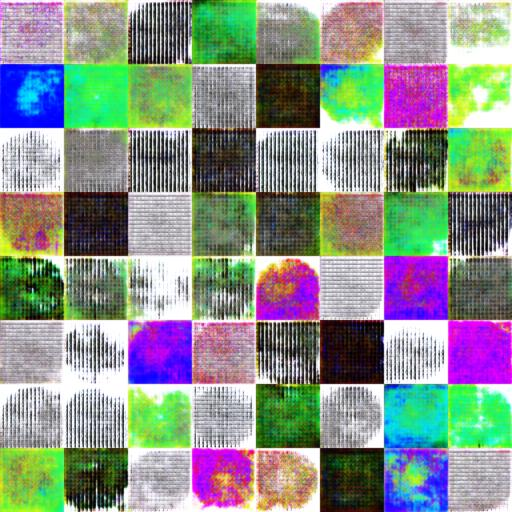

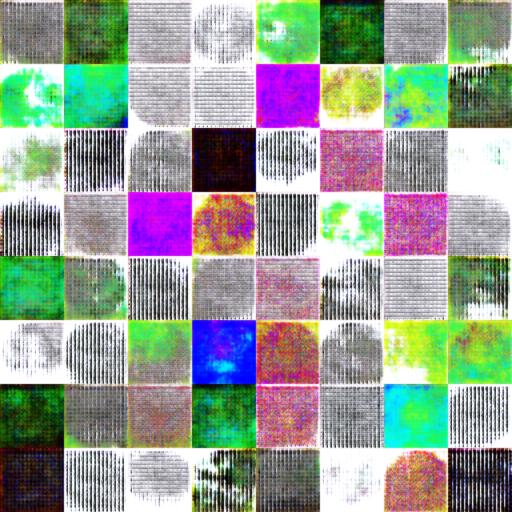

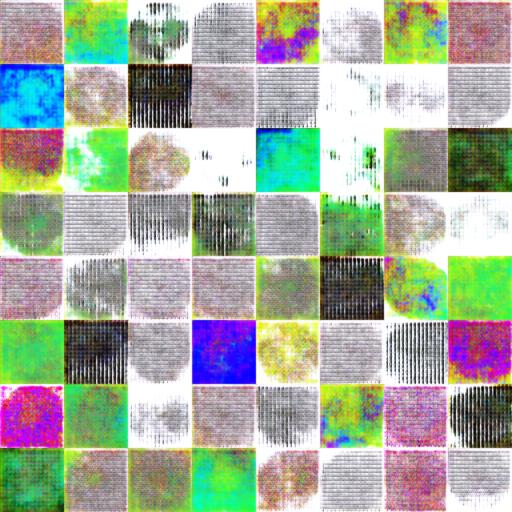

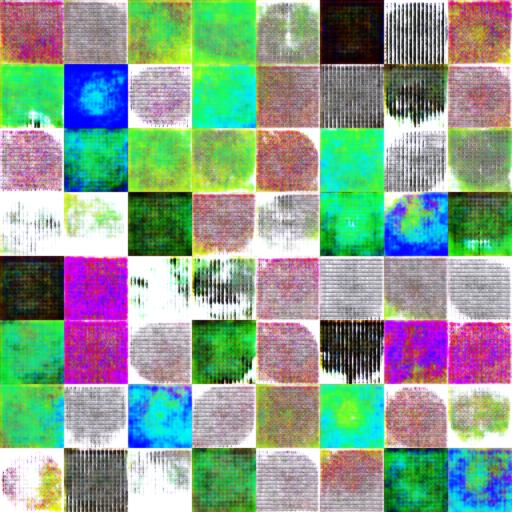

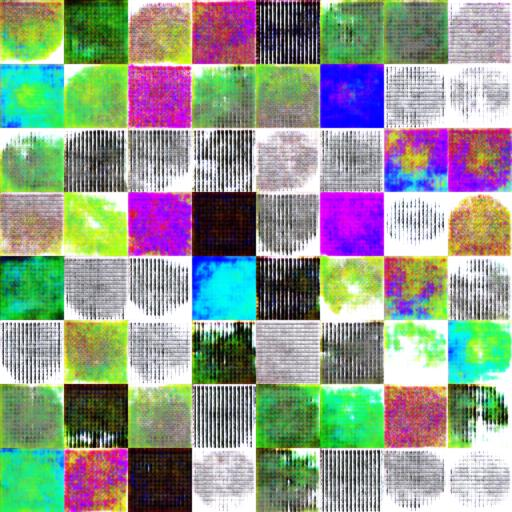

In [7]:
h = 512
w = 512

for i in range(5):
  img0 = load_image("samples/test_arange_" + str(i) + ".png",h, w)
  display_image(img0)


Move to the google drive

In [0]:
!mkdir /content/gdrive/My\ Drive/pics/illusionPick_out6/
!mv samples/*.* /content/gdrive/My\ Drive/pics/illusionPick_out6/